In [8]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [9]:
import yfinance as yf
import datetime as dt
import time
import matplotlib.mlab as m
from datetime import date, timedelta

In [10]:
date.today().strftime("%m/%d/%y")

'04/04/21'

In [11]:
def consulta_bc(codigo_bcb: int) -> pd.DataFrame: 
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json'
    df = pd.read_json(url)
    df['Date'] = pd.to_datetime(df['data'], dayfirst=True)
    df.rename(columns = {'valor':'PIB'}, inplace = True)
    df = df.drop('data', 1)
    return df

In [12]:
pib = consulta_bc(1207)

In [13]:
print(pib)

             PIB       Date
0   0.000000e+00 1962-01-01
1   0.000000e+00 1963-01-01
2   1.000000e-02 1964-01-01
3   2.000000e-02 1965-01-01
4   2.000000e-02 1966-01-01
5   3.000000e-02 1967-01-01
6   4.000000e-02 1968-01-01
7   6.000000e-02 1969-01-01
8   7.000000e-02 1970-01-01
9   9.000000e-02 1971-01-01
10  1.300000e-01 1972-01-01
11  1.900000e-01 1973-01-01
12  2.700000e-01 1974-01-01
13  3.800000e-01 1975-01-01
14  5.900000e-01 1976-01-01
15  9.100000e-01 1977-01-01
16  1.320000e+00 1978-01-01
17  2.170000e+00 1979-01-01
18  4.550000e+00 1980-01-01
19  8.730000e+00 1981-01-01
20  1.770000e+01 1982-01-01
21  3.978000e+01 1983-01-01
22  1.265000e+02 1984-01-01
23  4.755300e+02 1985-01-01
24  1.273680e+03 1986-01-01
25  4.037810e+03 1987-01-01
26  2.937563e+04 1988-01-01
27  4.255953e+05 1989-01-01
28  1.154879e+07 1990-01-01
29  6.028600e+07 1991-01-01
30  6.409588e+08 1992-01-01
31  1.409711e+10 1993-01-01
32  3.492047e+11 1994-01-01
33  7.059916e+11 1995-01-01
34  8.547636e+11 199

In [14]:
pib.dtypes

PIB            float64
Date    datetime64[ns]
dtype: object

In [15]:
symbols = ['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA', 'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA', 'LAME4.SA', 'LCAM3.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA', 'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT3.SA', 'VVAR3.SA', 'WEGE3.SA', 'YDUQ3.SA']

In [20]:
date.today().strftime("%Y-%m-%d")

'2021-04-04'

In [21]:
a = yf.download(symbols, start="2008-08-28", end=date.today().strftime("%Y-%m-%d"))

[*********************100%***********************]  82 of 82 completed


In [22]:
a

Adj Close                                                         \
             ABEV3.SA   ASAI3.SA   AZUL4.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   
Date                                                                           
2008-08-28   2.302986        NaN        NaN   7.822841  11.519292   6.088486   
2008-08-29   2.300372        NaN        NaN   7.785291  11.324131   6.052325   
2008-09-01   2.295143        NaN        NaN   8.041878  11.009962   5.943841   
2008-09-02   2.284687        NaN        NaN   7.797809  11.109930   6.059610   
2008-09-03   2.298804        NaN        NaN   7.447343  10.995689   6.070915   
...               ...        ...        ...        ...        ...        ...   
2021-03-29  15.300000  73.500000  36.480000  53.599998  29.799999  23.412197   
2021-03-30  15.590000  73.500000  39.009998  53.500000  30.719999  23.961779   
2021-03-31  15.290000  73.839996  37.849998  54.619999  30.450001  23.492136   
2021-04-01  15.000000  75.059998  37.990002  53.610001  29.950001  22.682753   
2021-04-02        NaN        NaN        NaN        NaN        NaN        NaN   

                                                        ...     Volume  \
             BBDC4.SA   BBSE3.SA   BEEF3.SA  BPAC11.SA  ...  TAEE11.SA   
Date                                                    ...              
2008-08-28  11.706909        NaN   6.432931        NaN  ...    51900.0   
2008-08-29  11.507120        NaN   6.343585        NaN  ...    39900.0   
2008-09-01  11.334228        NaN   6.522278        NaN  ...    12600.0   
2008-09-02  11.641342        NaN   6.459735        NaN  ...    68700.0   
2008-09-03  11.722054        NaN   6.522278        NaN  ...   393900.0   
...               ...        ...        ...        ...  ...        ...   
2021-03-29  26.890202  24.070000  10.470000  91.690002  ...  4604800.0   
2021-03-30  27.339872  24.780001  10.360000  97.419998  ...  2900900.0   
2021-03-31  26.750305  24.250000  10.200000  97.050003  ...  2809100.0   
2021-04-01  25.771027  23.920000  10.200000  94.550003  ...  2903800.0   
2021-04-02        NaN        NaN        NaN        NaN  ...        NaN   

                                                                      \
             TIMS3.SA    TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA   
Date                                                                   
2008-08-28   322700.0  15088614.0        0.0   3526800.0   3610800.0   
2008-08-29   931900.0    371203.0        0.0   4817000.0   2434100.0   
2008-09-01   504300.0    150285.0        0.0   1755400.0   1072200.0   
2008-09-02   525300.0     12022.0        0.0   5227200.0   2650800.0   
2008-09-03   937700.0     60114.0        0.0   5784400.0   3891200.0   
...               ...         ...        ...         ...         ...   
2021-03-29  3451200.0   4870300.0  4089700.0  18243400.0  25960500.0   
2021-03-30  2806300.0   5160200.0  4777100.0  15468000.0  18118600.0   
2021-03-31  6094600.0   4092500.0  4591500.0  18295400.0  18792000.0   
2021-04-01  6107700.0   4806100.0  3066400.0  15087600.0  17193400.0   
2021-04-02        NaN         NaN        NaN         NaN         NaN   

                                                         
             VIVT3.SA    VVAR3.SA   WEGE3.SA   YDUQ3.SA  
Date                                                     
2008-08-28    14300.0    418800.0  1342874.0   567000.0  
2008-08-29    39200.0     72800.0  1795456.0   212100.0  
2008-09-01    10700.0      3600.0  1253304.0   199500.0  
2008-09-02    19700.0         0.0  1127906.0   459900.0  
2008-09-03    17900.0     13200.0  1577108.0   881700.0  
...               ...         ...        ...        ...  
2021-03-29  1858600.0  33548900.0  4934400.0  1223600.0  
2021-03-30  1987400.0  49654600.0  6287700.0  2396200.0  
2021-03-31  3165100.0  36317300.0  6042600.0  4966000.0  
2021-04-01  3349300.0  40294400.0  6445100.0  1905100.0  
2021-04-02        NaN         NaN        NaN        NaN  

[3124 rows x 492 columns]

In [23]:
# def unpivot_df(df: pd.DataFrame, var_name: str = 'index', value_name: str = 'return') -> pd.DataFrame:
#     df = df.reset_index()
#     df = df.melt('Date', var_name=var_name, value_name=value_name)
#     df.dropna(how='any', inplace=True)
#     return df

In [24]:
stocks_br = a.stack()

In [25]:
stocks_br.dtypes

Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [26]:
stocks_br.head()

Adj Close      Close       High        Low       Open  \
Date                                                                         
2008-08-28 ABEV3.SA   2.302986   3.520049   3.635519   3.432147   3.513256   
           B3SA3.SA   7.822841  12.500000  12.850000  12.260000  12.350000   
           BBAS3.SA  11.519292  24.200001  24.209999  23.610001  23.700001   
           BBDC3.SA   6.088486   9.544709   9.565967   9.349847   9.349847   
           BBDC4.SA  11.706909  18.998482  19.067066  18.761545  18.954836   

                        Volume  
Date                            
2008-08-28 ABEV3.SA  3318720.0  
           B3SA3.SA  6715900.0  
           BBAS3.SA  8496000.0  
           BBDC3.SA   265033.0  
           BBDC4.SA  5810612.0

In [27]:
stocks_br.index.set_names('Name', level=1, inplace=True)


In [28]:
stocks_br

Adj Close      Close       High        Low       Open  \
Date       Name                                                              
2008-08-28 ABEV3.SA   2.302986   3.520049   3.635519   3.432147   3.513256   
           B3SA3.SA   7.822841  12.500000  12.850000  12.260000  12.350000   
           BBAS3.SA  11.519292  24.200001  24.209999  23.610001  23.700001   
           BBDC3.SA   6.088486   9.544709   9.565967   9.349847   9.349847   
           BBDC4.SA  11.706909  18.998482  19.067066  18.761545  18.954836   
...                        ...        ...        ...        ...        ...   
2021-04-01 VALE3.SA  97.389999  97.389999  98.860001  96.129997  98.500000   
           VIVT3.SA  44.139999  44.139999  44.549999  43.689999  44.430000   
           VVAR3.SA  12.250000  12.250000  12.520000  12.070000  12.100000   
           WEGE3.SA  75.059998  75.059998  77.570000  74.760002  75.279999   
           YDUQ3.SA  26.639999  26.639999  27.379999  26.330000  26.920000   

                         Volume  
Date       Name                  
2008-08-28 ABEV3.SA   3318720.0  
           B3SA3.SA   6715900.0  
           BBAS3.SA   8496000.0  
           BBDC3.SA    265033.0  
           BBDC4.SA   5810612.0  
...                         ...  
2021-04-01 VALE3.SA  17193400.0  
           VIVT3.SA   3349300.0  
           VVAR3.SA  40294400.0  
           WEGE3.SA   6445100.0  
           YDUQ3.SA   1905100.0  

[223365 rows x 6 columns]

In [29]:
stocks_br = stocks_br.reset_index(level=['Date', 'Name'])

In [30]:
stocks_br

,Date,Name,Adj Close,Close,High,Low,Open,Volume
0,2008-08-28,ABEV3.SA,2.302986,3.520049,3.635519,3.432147,3.513256,3318720.0
1,2008-08-28,B3SA3.SA,7.822841,12.500000,12.850000,12.260000,12.350000,6715900.0
2,2008-08-28,BBAS3.SA,11.519292,24.200001,24.209999,23.610001,23.700001,8496000.0
3,2008-08-28,BBDC3.SA,6.088486,9.544709,9.565967,9.349847,9.349847,265033.0
4,2008-08-28,BBDC4.SA,11.706909,18.998482,19.067066,18.761545,18.954836,5810612.0
...,...,...,...,...,...,...,...,...
223360,2021-04-01,VALE3.SA,97.389999,97.389999,98.860001,96.129997,98.500000,17193400.0
223361,2021-04-01,VIVT3.SA,44.139999,44.139999,44.549999,43.689999,44.430000,3349300.0
223362,2021-04-01,VVAR3.SA,12.250000,12.250000,12.520000,12.070000,12.100000,40294400.0
223363,2021-04-01,WEGE3.SA,75.059998,75.059998,77.570000,74.760002,75.279999,6445100.0


In [31]:
stocks_br['Name'] = stocks_br['Name'].map(lambda x: str(x)[:-3])

In [32]:
stocks_br

,Date,Name,Adj Close,Close,High,Low,Open,Volume
0,2008-08-28,ABEV3,2.302986,3.520049,3.635519,3.432147,3.513256,3318720.0
1,2008-08-28,B3SA3,7.822841,12.500000,12.850000,12.260000,12.350000,6715900.0
2,2008-08-28,BBAS3,11.519292,24.200001,24.209999,23.610001,23.700001,8496000.0
3,2008-08-28,BBDC3,6.088486,9.544709,9.565967,9.349847,9.349847,265033.0
4,2008-08-28,BBDC4,11.706909,18.998482,19.067066,18.761545,18.954836,5810612.0
...,...,...,...,...,...,...,...,...
223360,2021-04-01,VALE3,97.389999,97.389999,98.860001,96.129997,98.500000,17193400.0
223361,2021-04-01,VIVT3,44.139999,44.139999,44.549999,43.689999,44.430000,3349300.0
223362,2021-04-01,VVAR3,12.250000,12.250000,12.520000,12.070000,12.100000,40294400.0
223363,2021-04-01,WEGE3,75.059998,75.059998,77.570000,74.760002,75.279999,6445100.0


In [33]:
# stocks_br.to_csv('../data/interim/stocks_br_2.csv', index=False)

In [34]:
stocks_br.dtypes

Date         datetime64[ns]
Name                 object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

In [35]:
stocks_br['Date'] = pd.to_datetime(stocks_br['Date'], dayfirst=True)

In [36]:
# stocks_br = pd.read_csv('../data/interim/ibovfull.csv')
# stocks_br['Date'] = pd.to_datetime(stocks_br['Date'], dayfirst=True)

In [37]:
qtde_acoes = pd.read_excel('../data/interim/tbl_valor_mercado_010421.xlsx')

In [38]:
print(qtde_acoes)

     Name nome_empresa  valor_mercado_reais_010421  valor_mercado_us_010421  \
0   ABEV3    AMBEV S/A                2.406530e+08              42239838.18   
1   ASAI3        ASSAI                1.981508e+07               3477977.24   
2   AZUL4         AZUL                1.255275e+07               2203280.99   
3   BTOW3  B2W DIGITAL                3.402521e+07               5972164.01   
4   B3SA3           B3                1.115340e+08              19576648.59   
..    ...          ...                         ...                      ...   
77  USIM5     USIMINAS                2.198492e+07               3858831.26   
78  VALE3         VALE                5.177200e+08              90871113.20   
79  VVAR3    VIAVAREJO                1.928006e+07               3384070.35   
80  WEGE3          WEG                1.564760e+08              27464942.16   
81  YDUQ3   YDUQS PART                8.255763e+06               1449065.91   

    Close_010421  qtde_acoes_010421  Unnamed: 6  Un

In [39]:
df = pd.merge(stocks_br,qtde_acoes,on='Name',how='left')

In [40]:
print(df)

             Date   Name  Adj Close      Close       High        Low  \
0      2008-08-28  ABEV3   2.302986   3.520049   3.635519   3.432147   
1      2008-08-28  B3SA3   7.822841  12.500000  12.850000  12.260000   
2      2008-08-28  BBAS3  11.519292  24.200001  24.209999  23.610001   
3      2008-08-28  BBDC3   6.088486   9.544709   9.565967   9.349847   
4      2008-08-28  BBDC4  11.706909  18.998482  19.067066  18.761545   
...           ...    ...        ...        ...        ...        ...   
223360 2021-04-01  VALE3  97.389999  97.389999  98.860001  96.129997   
223361 2021-04-01  VIVT3  44.139999  44.139999  44.549999  43.689999   
223362 2021-04-01  VVAR3  12.250000  12.250000  12.520000  12.070000   
223363 2021-04-01  WEGE3  75.059998  75.059998  77.570000  74.760002   
223364 2021-04-01  YDUQ3  26.639999  26.639999  27.379999  26.330000   

             Open      Volume  nome_empresa  valor_mercado_reais_010421  \
0        3.513256   3318720.0     AMBEV S/A                2

In [41]:
df['Marketcap'] = df['qtde_acoes_010421'] * df['Close']

In [42]:
print(df)

             Date   Name  Adj Close      Close       High        Low  \
0      2008-08-28  ABEV3   2.302986   3.520049   3.635519   3.432147   
1      2008-08-28  B3SA3   7.822841  12.500000  12.850000  12.260000   
2      2008-08-28  BBAS3  11.519292  24.200001  24.209999  23.610001   
3      2008-08-28  BBDC3   6.088486   9.544709   9.565967   9.349847   
4      2008-08-28  BBDC4  11.706909  18.998482  19.067066  18.761545   
...           ...    ...        ...        ...        ...        ...   
223360 2021-04-01  VALE3  97.389999  97.389999  98.860001  96.129997   
223361 2021-04-01  VIVT3  44.139999  44.139999  44.549999  43.689999   
223362 2021-04-01  VVAR3  12.250000  12.250000  12.520000  12.070000   
223363 2021-04-01  WEGE3  75.059998  75.059998  77.570000  74.760002   
223364 2021-04-01  YDUQ3  26.639999  26.639999  27.379999  26.330000   

             Open      Volume  nome_empresa  valor_mercado_reais_010421  \
0        3.513256   3318720.0     AMBEV S/A                2

In [43]:
mktcap_br = df.groupby(
     ['Date']
 ).agg(
     Marketcap_br = ('Marketcap','sum'),
 ).reset_index()

In [44]:
# mktcap_br['Date'] = pd.to_datetime(mktcap_br['Date'], dayfirst=True)

In [45]:
mktcap_br.dtypes

Date            datetime64[ns]
Marketcap_br           float64
dtype: object

In [46]:
mktcap_br['Marketcap_br'] = mktcap_br['Marketcap_br'] *1000

In [47]:
print(mktcap_br)

           Date  Marketcap_br
0    2008-08-28  1.926061e+12
1    2008-08-29  1.910433e+12
2    2008-09-01  1.888238e+12
3    2008-09-02  1.859931e+12
4    2008-09-03  1.838145e+12
...         ...           ...
3114 2021-03-26  4.064132e+12
3115 2021-03-29  4.083591e+12
3116 2021-03-30  4.138180e+12
3117 2021-03-31  4.125989e+12
3118 2021-04-01  4.072060e+12

[3119 rows x 2 columns]


In [48]:
mktcap_br['Year'] = mktcap_br['Date'].dt.to_period('Y')

In [49]:
mktcap_br

,Date,Marketcap_br,Year
0,2008-08-28,1.926061e+12,2008
1,2008-08-29,1.910433e+12,2008
2,2008-09-01,1.888238e+12,2008
3,2008-09-02,1.859931e+12,2008
4,2008-09-03,1.838145e+12,2008
...,...,...,...
3114,2021-03-26,4.064132e+12,2021
3115,2021-03-29,4.083591e+12,2021
3116,2021-03-30,4.138180e+12,2021
3117,2021-03-31,4.125989e+12,2021


In [50]:
pib['Year'] = pib['Date'].dt.to_period('Y')

In [51]:
print(pib)

             PIB       Date  Year
0   0.000000e+00 1962-01-01  1962
1   0.000000e+00 1963-01-01  1963
2   1.000000e-02 1964-01-01  1964
3   2.000000e-02 1965-01-01  1965
4   2.000000e-02 1966-01-01  1966
5   3.000000e-02 1967-01-01  1967
6   4.000000e-02 1968-01-01  1968
7   6.000000e-02 1969-01-01  1969
8   7.000000e-02 1970-01-01  1970
9   9.000000e-02 1971-01-01  1971
10  1.300000e-01 1972-01-01  1972
11  1.900000e-01 1973-01-01  1973
12  2.700000e-01 1974-01-01  1974
13  3.800000e-01 1975-01-01  1975
14  5.900000e-01 1976-01-01  1976
15  9.100000e-01 1977-01-01  1977
16  1.320000e+00 1978-01-01  1978
17  2.170000e+00 1979-01-01  1979
18  4.550000e+00 1980-01-01  1980
19  8.730000e+00 1981-01-01  1981
20  1.770000e+01 1982-01-01  1982
21  3.978000e+01 1983-01-01  1983
22  1.265000e+02 1984-01-01  1984
23  4.755300e+02 1985-01-01  1985
24  1.273680e+03 1986-01-01  1986
25  4.037810e+03 1987-01-01  1987
26  2.937563e+04 1988-01-01  1988
27  4.255953e+05 1989-01-01  1989
28  1.154879e+

In [52]:
# combined = pd.concat([pib,mktcap_br], ignore_index=True)
combined = pd.merge(mktcap_br,pib,on='Year',how='left')

In [53]:
combined

,Date_x,Marketcap_br,Year,PIB,Date_y
0,2008-08-28,1.926061e+12,2008,3.109803e+12,2008-01-01
1,2008-08-29,1.910433e+12,2008,3.109803e+12,2008-01-01
2,2008-09-01,1.888238e+12,2008,3.109803e+12,2008-01-01
3,2008-09-02,1.859931e+12,2008,3.109803e+12,2008-01-01
4,2008-09-03,1.838145e+12,2008,3.109803e+12,2008-01-01
...,...,...,...,...,...
3114,2021-03-26,4.064132e+12,2021,NaN,NaT
3115,2021-03-29,4.083591e+12,2021,NaN,NaT
3116,2021-03-30,4.138180e+12,2021,NaN,NaT
3117,2021-03-31,4.125989e+12,2021,NaN,NaT


In [54]:
combined['PIB'].fillna(method='ffill', inplace=True)

In [55]:
# combined = pd.merge(mktcap_br.assign(grouper=mktcap_br['Date'].dt.to_period('Y')),
#                pib.assign(grouper=pib['Date'].dt.to_period('Y')),
#                how='left', on='Date')

In [56]:
print(combined)

         Date_x  Marketcap_br  Year           PIB     Date_y
0    2008-08-28  1.926061e+12  2008  3.109803e+12 2008-01-01
1    2008-08-29  1.910433e+12  2008  3.109803e+12 2008-01-01
2    2008-09-01  1.888238e+12  2008  3.109803e+12 2008-01-01
3    2008-09-02  1.859931e+12  2008  3.109803e+12 2008-01-01
4    2008-09-03  1.838145e+12  2008  3.109803e+12 2008-01-01
...         ...           ...   ...           ...        ...
3114 2021-03-26  4.064132e+12  2021  7.447858e+12        NaT
3115 2021-03-29  4.083591e+12  2021  7.447858e+12        NaT
3116 2021-03-30  4.138180e+12  2021  7.447858e+12        NaT
3117 2021-03-31  4.125989e+12  2021  7.447858e+12        NaT
3118 2021-04-01  4.072060e+12  2021  7.447858e+12        NaT

[3119 rows x 5 columns]


In [57]:
# # Get a list of dates available in the GDP dataframe
# gdp_dates = mktcap_br['Date']

# # Loop through the dgp dates and fill the GDP column in the combined dataframe
# prev_date = None
# for date in gdp_dates:
#     if prev_date == None:
#         combined.loc[:date,'PIB'] = pib.loc[date,'PIB']
#     else:
#         combined.loc[date_prev:date,'PIB'] = pib.loc[date_prev,'PIB']
#     date_prev = date
    
# combined.loc[date:,'PIB'] = pib.loc[date,'PIB']

In [58]:
print(combined.tail())

         Date_x  Marketcap_br  Year           PIB Date_y
3114 2021-03-26  4.064132e+12  2021  7.447858e+12    NaT
3115 2021-03-29  4.083591e+12  2021  7.447858e+12    NaT
3116 2021-03-30  4.138180e+12  2021  7.447858e+12    NaT
3117 2021-03-31  4.125989e+12  2021  7.447858e+12    NaT
3118 2021-04-01  4.072060e+12  2021  7.447858e+12    NaT


In [59]:
combined['Buffett_Indicator'] = combined.Marketcap_br / combined.PIB 
print(combined.tail())

         Date_x  Marketcap_br  Year           PIB Date_y  Buffett_Indicator
3114 2021-03-26  4.064132e+12  2021  7.447858e+12    NaT           0.545678
3115 2021-03-29  4.083591e+12  2021  7.447858e+12    NaT           0.548291
3116 2021-03-30  4.138180e+12  2021  7.447858e+12    NaT           0.555620
3117 2021-03-31  4.125989e+12  2021  7.447858e+12    NaT           0.553983
3118 2021-04-01  4.072060e+12  2021  7.447858e+12    NaT           0.546742


In [61]:
# mask = (combined['Date_x'] > '01/01/2013') & (combined['Date_x'] <= '01/04/2021')
mask = (combined['Date_x'] > '01/01/2013') & (combined['Date_x'] <= date.today().strftime("%d/%m/%Y"))

In [62]:
combined = combined.loc[mask]

In [63]:
# combined.to_csv('../data/interim/Buffett_Indicator.csv', index=False)

In [64]:
combined.set_index('Date_x', inplace=True)

In [65]:
combined['num_lin'] = np.arange(len(combined))

<ipython-input-65-ea038a30f945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['num_lin'] = np.arange(len(combined))


In [66]:
combined

,Marketcap_br,Year,PIB,Date_y,Buffett_Indicator,num_lin
Date_x,,,,,,
2013-01-02,2.248670e+12,2013,5.331619e+12,2013-01-01,0.421761,0
2013-01-03,2.277833e+12,2013,5.331619e+12,2013-01-01,0.427231,1
2013-01-04,2.264919e+12,2013,5.331619e+12,2013-01-01,0.424809,2
2013-01-07,2.242850e+12,2013,5.331619e+12,2013-01-01,0.420670,3
2013-01-08,2.213776e+12,2013,5.331619e+12,2013-01-01,0.415217,4
...,...,...,...,...,...,...
2021-03-26,4.064132e+12,2021,7.447858e+12,NaT,0.545678,2039
2021-03-29,4.083591e+12,2021,7.447858e+12,NaT,0.548291,2040
2021-03-30,4.138180e+12,2021,7.447858e+12,NaT,0.555620,2041


In [75]:
# Linha de Tendëncia
x = combined['num_lin']
op = combined['Buffett_Indicator']
coef = np.polyfit(x, op, 2)
combined['tend'] = coef[0] * x ** 2 + coef[1] * x + coef[2] 

<ipython-input-75-fcb320db178c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['tend'] = coef[0] * x ** 2 + coef[1] * x + coef[2]


In [76]:
# from pylab import *
# from scipy.optimize import curve_fit

# # x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
# # y = np.array([109,62,39,13,10,4,2,0,1,2])

# def func(x, a, b):
#     return a*np.log(x) + b

# popt, pcov = curve_fit(func, x, op, [3,-10])
# print(popt)


In [77]:
# combined['tend'] = func(x,*popt)

In [78]:
# plot(x,y)
# show()

In [79]:
stdev = np.std(combined['Buffett_Indicator'])

In [80]:
combined['stdev'] = combined['tend'] + stdev
combined['2stdev'] = combined['tend'] + stdev + stdev
combined['stdevneg'] = combined['tend'] - stdev
combined['2stdevneg'] = combined['tend'] - stdev - stdev

<ipython-input-80-5e48b1b09fdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['stdev'] = combined['tend'] + stdev
<ipython-input-80-5e48b1b09fdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['2stdev'] = combined['tend'] + stdev + stdev
<ipython-input-80-5e48b1b09fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [81]:
combined

,Marketcap_br,Year,PIB,Date_y,Buffett_Indicator,num_lin,tend,stdev,2stdev,stdevneg,2stdevneg
Date_x,,,,,,,,,,,
2013-01-02,2.248670e+12,2013,5.331619e+12,2013-01-01,0.421761,0,0.392294,0.467045,0.541796,0.317544,0.242793
2013-01-03,2.277833e+12,2013,5.331619e+12,2013-01-01,0.427231,1,0.392137,0.466888,0.541638,0.317386,0.242636
2013-01-04,2.264919e+12,2013,5.331619e+12,2013-01-01,0.424809,2,0.391980,0.466730,0.541481,0.317229,0.242479
2013-01-07,2.242850e+12,2013,5.331619e+12,2013-01-01,0.420670,3,0.391823,0.466573,0.541324,0.317072,0.242322
2013-01-08,2.213776e+12,2013,5.331619e+12,2013-01-01,0.415217,4,0.391666,0.466417,0.541167,0.316916,0.242165
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,4.064132e+12,2021,7.447858e+12,NaT,0.545678,2039,0.566689,0.641439,0.716190,0.491938,0.417187
2021-03-29,4.083591e+12,2021,7.447858e+12,NaT,0.548291,2040,0.567017,0.641768,0.716518,0.492267,0.417516
2021-03-30,4.138180e+12,2021,7.447858e+12,NaT,0.555620,2041,0.567346,0.642097,0.716847,0.492596,0.417845


No handles with labels found to put in legend.


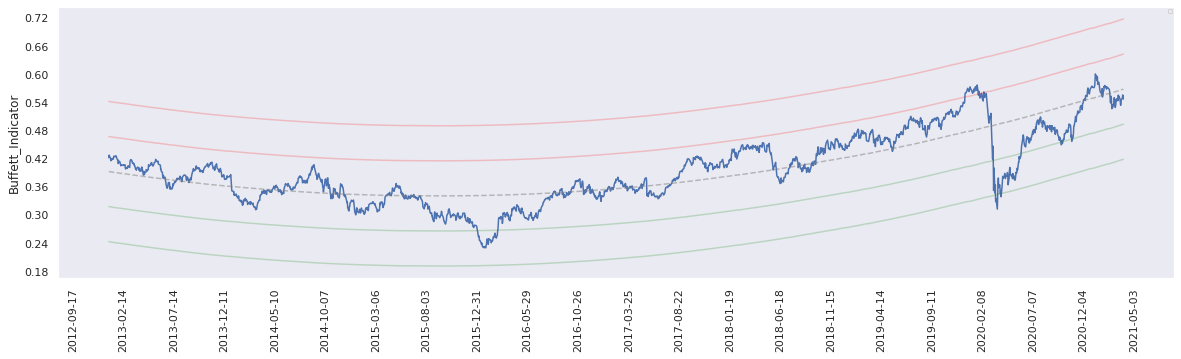

In [82]:
# PLOT WB Indicator GRAPH
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x='Date_x', y='Buffett_Indicator', data=combined, ax=ax)
ax = sns.lineplot(x='Date_x', y='tend', data=combined, ax=ax, color = 'gray', alpha = 0.5,  ls="--")
ax = sns.lineplot(x='Date_x', y='stdev', data=combined, ax=ax, color = 'red', alpha = 0.2)
ax = sns.lineplot(x='Date_x', y='2stdev', data=combined, ax=ax, color = 'red', alpha = 0.2)
ax = sns.lineplot(x='Date_x', y='stdevneg', data=combined, ax=ax, color = 'green', alpha = 0.2)
ax = sns.lineplot(x='Date_x', y='2stdevneg', data=combined, ax=ax, color = 'green', alpha = 0.2)
plt.grid()
# X Axis
# plt.xlim(start_date, end_date)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.label.set_visible(False)
# Y Axis
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
# st.pyplot(fig)
ax.legend(fontsize=5)

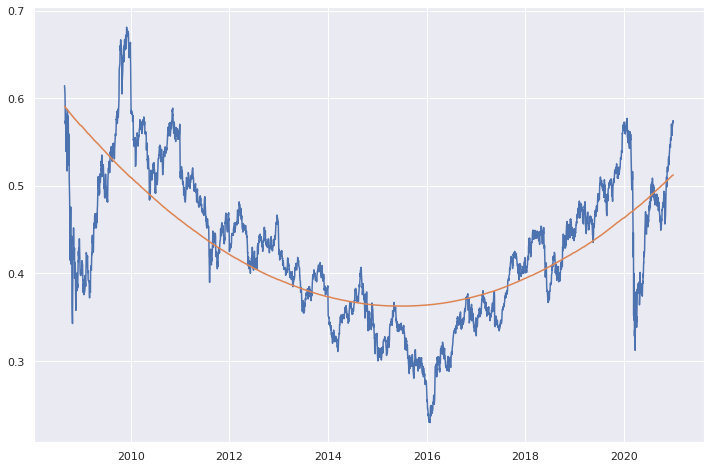

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Get the starting and ending date
min_date = combined.index.values[0]
max_date = combined.index.values[-1]
num_dates = len(combined.index.values)
quarter_date = combined.index.values[int(num_dates/4)]
three_quarter_date = combined.index.values[int(3*num_dates/4)]

plt.plot(combined.index.values,combined.Buffett_Indicator, combined.tend)

plt.show()

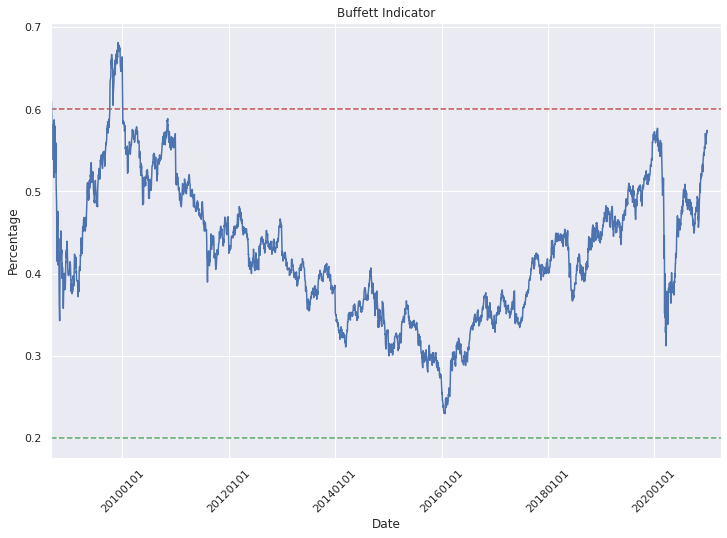

In [51]:
fig = plt.figure(figsize=(12,8))

plt.plot(combined.index.values,combined.Buffett_Indicator)

ax = plt.gca()

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y%m%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Buffett Indicator')
ax.set_xlim(min_date,max_date)

# Rotate the x-tick labels so that they are more legible
plt.xticks(rotation=45)

# Add the horizontal lines
plt.hlines(0.60,min_date,max_date,colors='r',linestyle='dashed')
plt.hlines(0.20,min_date,max_date,colors='g',linestyle='dashed')

# plt.text(quarter_date,100,'Over-valued',ha='center',va='center',color='r',backgroundcolor='white')
# plt.text(three_quarter_date,80,'Under-valued',ha='center',va='center',color='g',backgroundcolor='white')

plt.show()